<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Credit%20Card%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [9]:
ros = RandomOverSampler()
df = pd.DataFrame(ros.fit_resample(df, df['Exited'])[0])

In [10]:
df['Exited'].value_counts()

,count
Exited,
1,7963
0,7963


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [14]:
x = df.iloc[: , :-1]
y = df['Exited']

In [15]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns = x.columns)

In [16]:
x.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.302086,-0.961944,-1.015057,0.077855,-1.016259,-1.343764,-0.759708,0.651445,1.079095,0.011417
1,-0.415025,1.546845,-1.015057,-0.016407,-1.359553,0.022380,-0.759708,-1.535049,1.079095,0.205522
2,-1.503349,-0.961944,-1.015057,0.077855,1.043505,1.258852,2.200320,0.651445,-0.926702,0.229608


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from keras.layers import Dense
from keras.models import Sequential

In [19]:
ann = Sequential()

In [20]:
ann.add(Dense(8, activation='relu'))
ann.add(Dense(6, activation='relu'))
ann.add(Dense(4, activation='relu'))
ann.add(Dense(3, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [21]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
ann.fit(x_train, y_train, epochs = 40, batch_size = 100, validation_data=(x_train, y_train))

Epoch 1/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7786 - loss: 0.4622 - val_accuracy: 0.7826 - val_loss: 0.4547
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7792 - loss: 0.4565 - val_accuracy: 0.7842 - val_loss: 0.4537
Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7799 - loss: 0.4555 - val_accuracy: 0.7843 - val_loss: 0.4543
Epoch 4/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7783 - loss: 0.4535 - val_accuracy: 0.7830 - val_loss: 0.4536
Epoch 5/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7842 - loss: 0.4462 - val_accuracy: 0.7816 - val_loss: 0.4531
Epoch 6/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7807 - loss: 0.4515 - val_accuracy: 0.7782 - val_loss: 0.4567
Epoch 7/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7773 - loss: 0.4615 - val_accuracy: 0.7841 - val_loss: 0.4529
Epoch 8/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7850 - loss: 0.4544 - val_accuracy: 

In [44]:
ann.history.history

{'accuracy': [0.781632661819458,
  0.7812401652336121,
  0.7810832262039185,
  0.7806122303009033,
  0.7807692289352417,
  0.7784929275512695,
  0.7815541625022888,
  0.7821035981178284,
  0.7799057960510254,
  0.7802982926368713,
  0.7811616659164429,
  0.7807692289352417,
  0.7810047268867493,
  0.7796703577041626,
  0.7826530337333679,
  0.7818681597709656,
  0.7822605967521667,
  0.7814756631851196,
  0.7806907296180725,
  0.780141294002533,
  0.7821820974349976,
  0.7813971638679504,
  0.7798272967338562,
  0.7825745940208435,
  0.7802197933197021,
  0.7817896604537964,
  0.7835164666175842,
  0.7823390960693359,
  0.7842229008674622,
  0.7849293351173401,
  0.7852433323860168,
  0.7824960947036743,
  0.7843014001846313,
  0.7839089632034302,
  0.7839089632034302,
  0.7861852645874023,
  0.7843798995018005,
  0.7861852645874023,
  0.7849293351173401,
  0.7859497666358948],
 'loss': [0.45645880699157715,
  0.4558480978012085,
  0.455836683511734,
  0.4558885097503662,
  0.454904735

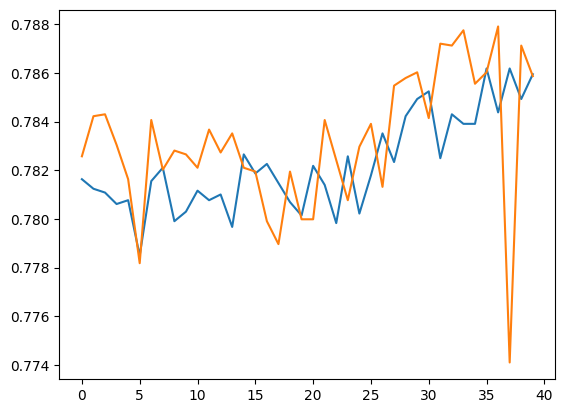

In [45]:
plt.plot(ann.history.history['accuracy'])
plt.plot(ann.history.history['val_accuracy'])
plt.show()

In [46]:
result = list(ann.predict(x_test))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
for i in range(len(result)):
    if result[i] > 0.5: result[i] = 1
    else: result[i] = 0

In [48]:
print(result, end=" ")

[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ann.predict(x_test) > 0.5)*100

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


79.03327055869428

In [50]:
accuracy_score(y_train, ann.predict(x_train) > 0.5)*100

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


78.58712715855573